# Traffic Sign Detection 

https://www.kaggle.com/datasets/pkdarabi/cardetection

In [26]:
import os 

root_dir = r".\data\traffic_sign_detection\car"

dir_train = os.path.join(root_dir, "train")
dir_test = os.path.join(root_dir, "test")
dir_valid = os.path.join(root_dir, "valid")

dir_train_img = os.path.join(dir_train, "images")
dir_train_lab = os.path.join(dir_train, "labels")

dir_test_img = os.path.join(dir_test, "images")
dir_test_lab = os.path.join(dir_test, "labels")

dir_valid_img = os.path.join(dir_valid, "images")
dir_valid_lab = os.path.join(dir_valid, "labels")

video_mp4 = r".\data\traffic_sign_detection\video.mp4"

classes_list = ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110', 'Speed Limit 120', 
                'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70',
                'Speed Limit 80', 'Speed Limit 90', 'Stop', 'No Traffic Sign']

classes_dict = {
    0: 'Green Light',
    1: 'Red Light',
    2: 'Speed Limit 10',
    3: 'Speed Limit 100',
    4: 'Speed Limit 110',
    5: 'Speed Limit 120',
    6: 'Speed Limit 20',
    7: 'Speed Limit 30',
    8: 'Speed Limit 40',
    9: 'Speed Limit 50',
    10: 'Speed Limit 60',
    11: 'Speed Limit 70',
    12: 'Speed Limit 80',
    13: 'Speed Limit 90',
    14: 'Stop', 
    15: 'No Traffic Sign'
}


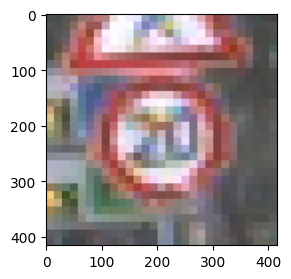

Class: 7 --> Speed Limit 30
Class: 6 --> Speed Limit 20


In [27]:
img_example = os.path.join(dir_train_img, "00000_00000_00000_png.rf.55d47572c5980af0892b0c2ada6dae77.jpg") 
label_example = os.path.join(dir_train_lab, "00000_00000_00000_png.rf.55d47572c5980af0892b0c2ada6dae77.txt") 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(3,3))
img = mpimg.imread(img_example)
imgplot = plt.imshow(img)
plt.show()

with open(label_example, 'r') as file:
    # Extract the first number from each line to identify class and convert it to the according sign 
    for line in file:
        sign_int = int(line.split(' ')[0])
        print(f"Class: {sign_int} --> {classes_dict[sign_int]}")


In [28]:
# print image as numpy array
print(img.shape)

(416, 416, 3)


In [29]:
from imageio.v2 import imread

a = imread(img_example)
a

array([[[74, 78, 81],
        [74, 78, 81],
        [74, 78, 81],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [67, 67, 67]],

       [[74, 78, 81],
        [74, 78, 81],
        [74, 78, 81],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [67, 67, 67]],

       [[74, 78, 81],
        [74, 78, 81],
        [74, 78, 81],
        ...,
        [67, 67, 67],
        [67, 67, 67],
        [67, 67, 67]],

       ...,

       [[85, 85, 87],
        [85, 85, 87],
        [85, 85, 87],
        ...,
        [90, 97, 89],
        [90, 97, 89],
        [90, 97, 89]],

       [[85, 85, 87],
        [85, 85, 87],
        [85, 85, 87],
        ...,
        [90, 97, 89],
        [90, 97, 89],
        [90, 97, 89]],

       [[85, 85, 87],
        [85, 85, 87],
        [85, 85, 87],
        ...,
        [90, 97, 89],
        [90, 97, 89],
        [90, 97, 89]]], dtype=uint8)

# Load Data 

In [30]:
from ts_model_functions import CustomImageDataset

import torch 
from torchvision import transforms

# Define the transformations for the images
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# train datalaoder
batch = 32
train_custom_dataset = CustomImageDataset(dir_train, transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_custom_dataset, batch_size=batch, shuffle=True)

# test datalaoder
test_custom_dataset = CustomImageDataset(dir_test, transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_custom_dataset, batch_size=batch, shuffle=True)

# valid datalaoder
valid_custom_dataset = CustomImageDataset(dir_valid, transform=transform)
valid_dataloader = torch.utils.data.DataLoader(train_custom_dataset, batch_size=batch, shuffle=True)

In [31]:
images, labels = next(iter(train_dataloader))
print(images[0], labels[0])

tensor([[[-0.0510, -0.0510, -0.0588,  ..., -0.0824, -0.0824, -0.0824],
         [-0.0510, -0.0510, -0.0588,  ..., -0.0980, -0.0980, -0.0980],
         [-0.0510, -0.0510, -0.0588,  ..., -0.1137, -0.1216, -0.1216],
         ...,
         [ 0.0275,  0.0275,  0.0275,  ...,  0.0118,  0.0118,  0.0039],
         [ 0.0353,  0.0353,  0.0353,  ...,  0.0039, -0.0039, -0.0039],
         [ 0.0353,  0.0353,  0.0353,  ..., -0.0039, -0.0039, -0.0118]],

        [[ 0.1059,  0.1059,  0.0980,  ...,  0.1216,  0.1216,  0.1216],
         [ 0.1059,  0.1059,  0.0980,  ...,  0.1059,  0.1059,  0.1059],
         [ 0.1059,  0.1059,  0.0980,  ...,  0.0902,  0.0824,  0.0824],
         ...,
         [ 0.2549,  0.2549,  0.2549,  ...,  0.2314,  0.2314,  0.2235],
         [ 0.2627,  0.2627,  0.2627,  ...,  0.2235,  0.2157,  0.2157],
         [ 0.2627,  0.2627,  0.2627,  ...,  0.2157,  0.2157,  0.2078]],

        [[ 0.3647,  0.3647,  0.3569,  ...,  0.3804,  0.3804,  0.3804],
         [ 0.3647,  0.3647,  0.3569,  ...,  0

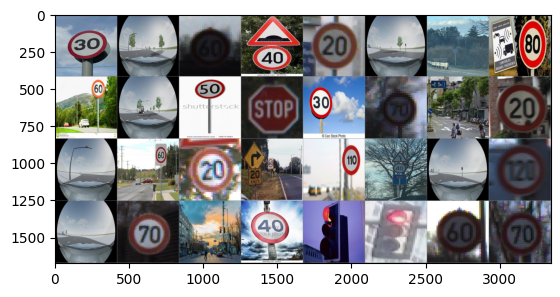

Speed Limit 30, Green Light, Speed Limit 60, Speed Limit 40, Speed Limit 20, Speed Limit 70, Speed Limit 50, Speed Limit 80, Speed Limit 60, Speed Limit 60, Speed Limit 50, Stop, Speed Limit 30, Speed Limit 70, Red Light, Speed Limit 20, Red Light, Speed Limit 60, Speed Limit 20, Speed Limit 60, Speed Limit 110, Speed Limit 40, Red Light, Speed Limit 120, Speed Limit 80, Speed Limit 70, Red Light, Speed Limit 40, Red Light, Red Light, Speed Limit 60, Speed Limit 70


In [32]:
import torchvision
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# show images
imshow(torchvision.utils.make_grid(images))
print(', '.join(f'{classes_list[labels[j]]}' for j in range(batch)))

# Load and initialize Model

In [33]:
from ts_model import ts_net

# Model instantiation
net = ts_net()

In [34]:
import torch.optim as optim
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
lr=0.001
momentum=0.9
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)

# Train Model 

In [11]:
from ts_model_functions import train 

model_directory = r".\nn"
epochs = 10
model_name = "ts_cnn"
full_model_name = model_name+"_"+str(epochs)+"epochs_"+str(batch)+"batchsize_"+str(lr)+"lr"

metrics_dict = train(net, train_dataloader, test_dataloader, epochs, optimizer, criterion, model_directory=r".\nn", model_name=full_model_name)

Epoch 1/10 Train Loss: 2.504116 Train Acc: 0.192635 Test Loss: 0.000 Test Acc: 0.000: 100%|██████████| 111/111 [01:09<00:00,  1.59it/s]
Epoch 2/10 Train Loss: 2.006607 Train Acc: 0.345042 Test Loss: 0.000 Test Acc: 0.000: 100%|██████████| 111/111 [01:10<00:00,  1.56it/s]
Epoch 3/10 Train Loss: 1.773086 Train Acc: 0.406232 Test Loss: 0.000 Test Acc: 0.000: 100%|██████████| 111/111 [01:07<00:00,  1.63it/s]
Epoch 4/10 Train Loss: 1.565790 Train Acc: 0.476771 Test Loss: 0.000 Test Acc: 0.000: 100%|██████████| 111/111 [01:07<00:00,  1.64it/s]
Epoch 5/10 Train Loss: 1.353608 Train Acc: 0.554674 Test Loss: 0.000 Test Acc: 0.000: 100%|██████████| 111/111 [01:08<00:00,  1.61it/s]
Epoch 6/10 Train Loss: 1.187391 Train Acc: 0.611331 Test Loss: 0.000 Test Acc: 0.000: 100%|██████████| 111/111 [01:12<00:00,  1.53it/s]
Epoch 7/10 Train Loss: 0.958534 Train Acc: 0.684419 Test Loss: 0.000 Test Acc: 0.000: 100%|██████████| 111/111 [01:11<00:00,  1.55it/s]
Epoch 8/10 Train Loss: 0.783825 Train Acc: 0.743

Finished Training


# Evaluation

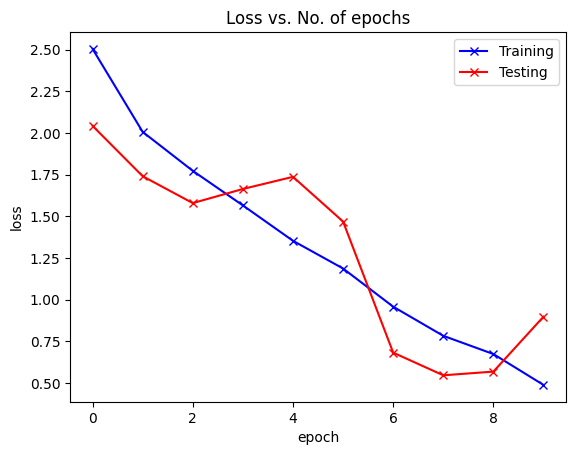

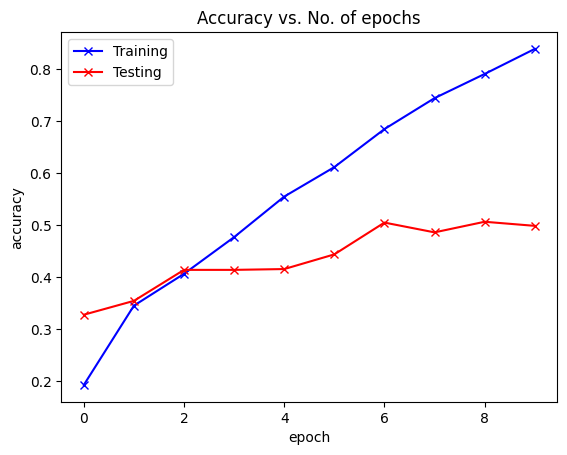

In [12]:
from ts_helper_functions import plot_accuracies, plot_losses

plot_losses(metrics_dict["train_losses"],metrics_dict["test_losses"])

plot_accuracies(metrics_dict["train_accuracies"],metrics_dict["test_accuracies"])

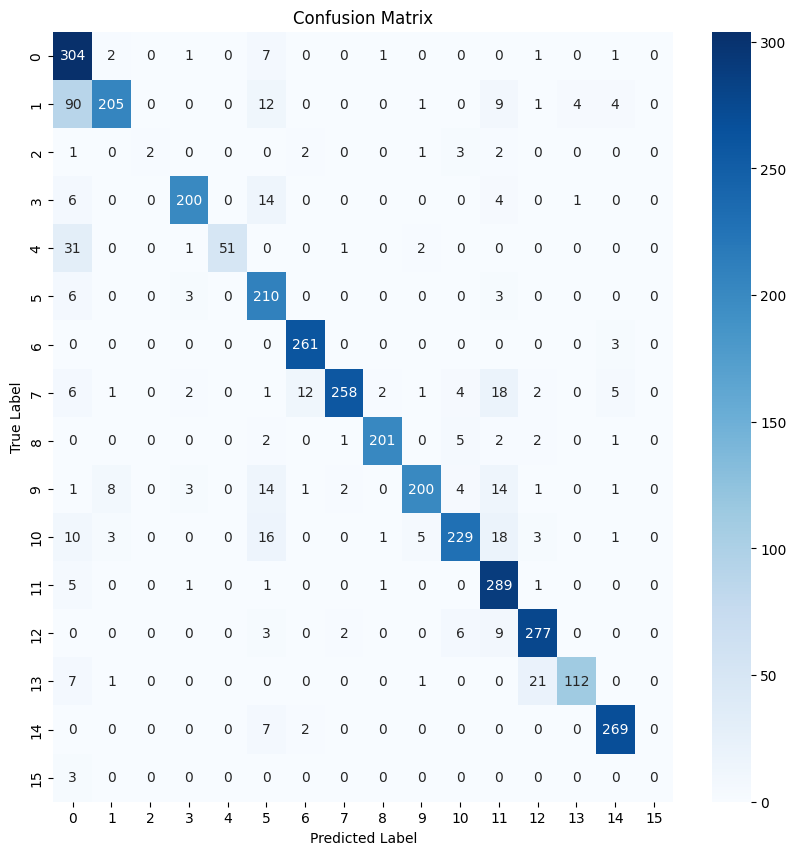

Accuracy:  0.8691
Precision: 0.8891
Recall:    0.8691
F1 Score:  0.8681


c:\Zeugs\cv\cv_venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
from ts_model_functions import evaluate_model_v2

accuracy, precision, recall, f1 = evaluate_model_v2(net, train_dataloader)

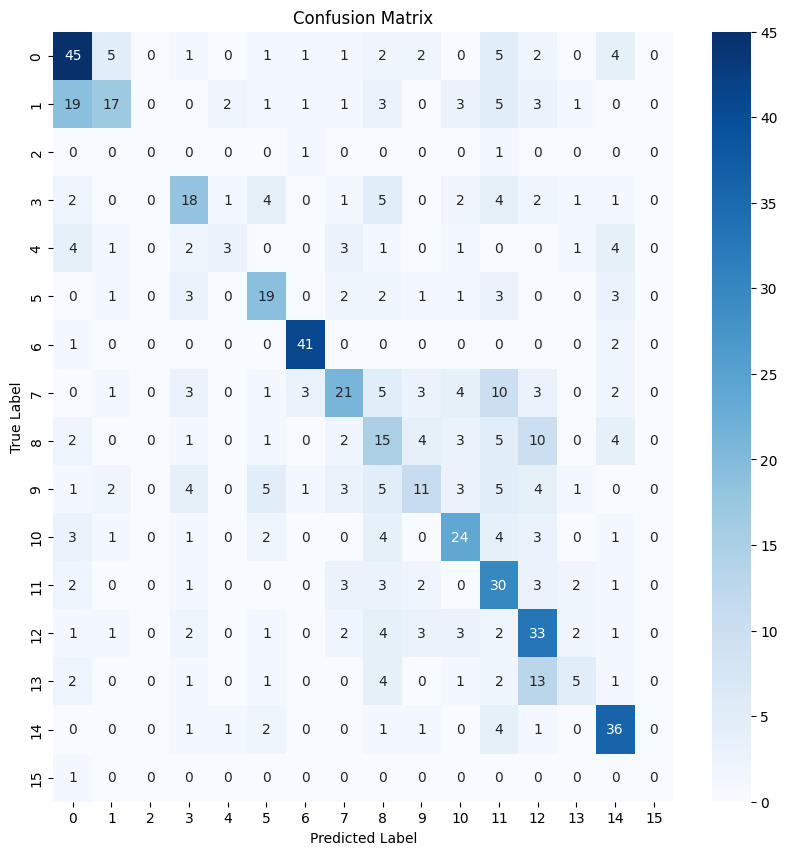

Accuracy:  0.4984
Precision: 0.4996
Recall:    0.4984
F1 Score:  0.4828


c:\Zeugs\cv\cv_venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
accuracy, precision, recall, f1 = evaluate_model_v2(net, test_dataloader)

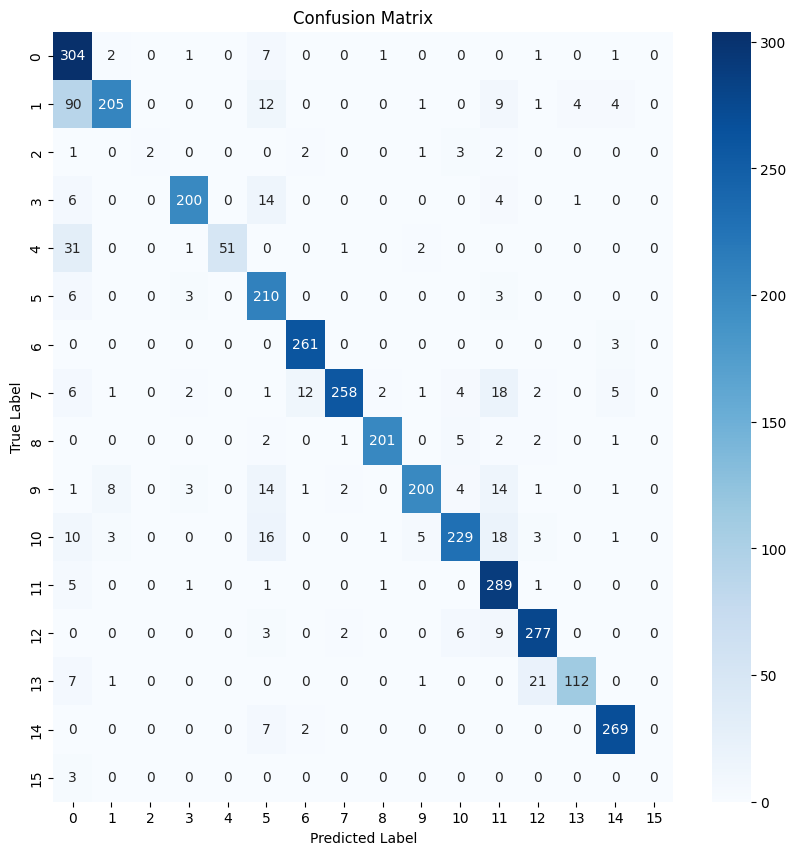

Accuracy:  0.8691
Precision: 0.8891
Recall:    0.8691
F1 Score:  0.8681


c:\Zeugs\cv\cv_venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
accuracy, precision, recall, f1 = evaluate_model_v2(net, valid_dataloader)


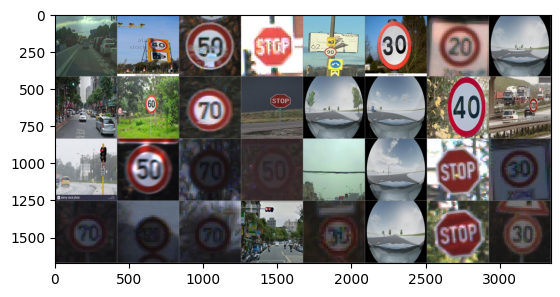

GroundTruth: Red Light       - Predicted: Green Light
GroundTruth: Speed Limit 40  - Predicted: Speed Limit 40
GroundTruth: Speed Limit 50  - Predicted: Speed Limit 50
GroundTruth: Stop            - Predicted: Stop
GroundTruth: Speed Limit 90  - Predicted: Speed Limit 90
GroundTruth: Speed Limit 30  - Predicted: Speed Limit 80
GroundTruth: Speed Limit 20  - Predicted: Speed Limit 20
GroundTruth: Speed Limit 50  - Predicted: Speed Limit 50
GroundTruth: Green Light     - Predicted: Red Light
GroundTruth: Speed Limit 60  - Predicted: Speed Limit 80
GroundTruth: Speed Limit 70  - Predicted: Speed Limit 70
GroundTruth: Stop            - Predicted: Stop
GroundTruth: Speed Limit 20  - Predicted: Speed Limit 20
GroundTruth: Speed Limit 90  - Predicted: Speed Limit 80
GroundTruth: Speed Limit 40  - Predicted: Red Light
GroundTruth: Speed Limit 120 - Predicted: Speed Limit 30
GroundTruth: Red Light       - Predicted: Speed Limit 50
GroundTruth: Speed Limit 50  - Predicted: Speed Limit 50
GroundT

In [19]:
dataiter = iter(test_dataloader)
images, labels = next(dataiter)
images, labels = next(dataiter)


# Predictions of the model
outputs = net(images)  # Adding the channel dimension
_, predicted = torch.max(outputs, 1)

# print images
imshow(torchvision.utils.make_grid(images))
for j in range(batch): 
    print(f"GroundTruth: {classes_list[labels[j]]:<15} - Predicted: {classes_list[predicted[j]]}")

# Train different model architectures: 

In [4]:
import os 

root_dir = r".\data\traffic_sign_detection\car"

dir_train = os.path.join(root_dir, "train")
dir_test = os.path.join(root_dir, "test")
dir_valid = os.path.join(root_dir, "valid")

dir_train_img = os.path.join(dir_train, "images")
dir_train_lab = os.path.join(dir_train, "labels")

dir_test_img = os.path.join(dir_test, "images")
dir_test_lab = os.path.join(dir_test, "labels")

dir_valid_img = os.path.join(dir_valid, "images")
dir_valid_lab = os.path.join(dir_valid, "labels")

video_mp4 = r".\data\traffic_sign_detection\video.mp4"

classes_list = ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110', 'Speed Limit 120', 
                'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70',
                'Speed Limit 80', 'Speed Limit 90', 'Stop', 'No Traffic Sign']

classes_dict = {
    0: 'Green Light',
    1: 'Red Light',
    2: 'Speed Limit 10',
    3: 'Speed Limit 100',
    4: 'Speed Limit 110',
    5: 'Speed Limit 120',
    6: 'Speed Limit 20',
    7: 'Speed Limit 30',
    8: 'Speed Limit 40',
    9: 'Speed Limit 50',
    10: 'Speed Limit 60',
    11: 'Speed Limit 70',
    12: 'Speed Limit 80',
    13: 'Speed Limit 90',
    14: 'Stop', 
    15: 'No Traffic Sign'
}


In [5]:
from ts_model_functions import CustomImageDataset

import torch 
from torchvision import transforms

# Define the transformations for the images
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# train datalaoder
batch = 32
train_custom_dataset = CustomImageDataset(dir_train, transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_custom_dataset, batch_size=batch, shuffle=True)

# test datalaoder
test_custom_dataset = CustomImageDataset(dir_test, transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_custom_dataset, batch_size=batch, shuffle=True)

# valid datalaoder
valid_custom_dataset = CustomImageDataset(dir_valid, transform=transform)
valid_dataloader = torch.utils.data.DataLoader(train_custom_dataset, batch_size=batch, shuffle=True)

In [6]:
from ts_model import ts_net_dropout, ts_net_filter_norm, ts_pretrained_rsnet18

ts_net_dropout, ts_net_filter_norm, ts_pretrained_rsnet18 = ts_net_dropout(), ts_net_filter_norm(), ts_pretrained_rsnet18()

c:\Zeugs\cv\cv_venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Zeugs\cv\cv_venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\heimb/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:07<00:00, 6.31MB/s]


In [8]:
import torch.optim as optim
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
lr=0.001
momentum=0.9
optimizer = optim.SGD(ts_net_dropout.parameters(), lr=lr, momentum=momentum)

In [10]:
from ts_model_functions import train 

model_directory = r".\nn"
epochs = 3
model_name = "ts_net_dropout"
full_model_name = model_name+"_"+str(epochs)+"epochs_"+str(batch)+"batchsize_"+str(lr)+"lr"

ts_net_dropout_metrics_dict = train(ts_net_dropout, train_dataloader, test_dataloader, epochs, optimizer, criterion, model_directory=r".\nn", model_name=full_model_name)

Epoch 1/3 Train Loss: 2.744828 Train Acc: 0.081020 Test Loss: 0.000 Test Acc: 0.000: 100%|██████████| 111/111 [05:34<00:00,  3.01s/it]
Epoch 2/3 Train Loss: 2.656640 Train Acc: 0.094901 Test Loss: 0.000 Test Acc: 0.000: 100%|██████████| 111/111 [04:56<00:00,  2.68s/it]
Epoch 3/3 Train Loss: 2.599999 Train Acc: 0.117847 Test Loss: 0.000 Test Acc: 0.000: 100%|██████████| 111/111 [05:06<00:00,  2.76s/it]


Finished Training


In [12]:
import torch.optim as optim
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
lr=0.001
momentum=0.9
optimizer = optim.SGD(ts_net_filter_norm.parameters(), lr=lr, momentum=momentum)

In [11]:
from ts_model_functions import train 

model_directory = r".\nn"
epochs = 3
model_name = "ts_net_filter_norm"
full_model_name = model_name+"_"+str(epochs)+"epochs_"+str(batch)+"batchsize_"+str(lr)+"lr"

ts_net_filter_norm_metrics_dict = train(ts_net_filter_norm, train_dataloader, test_dataloader, epochs, optimizer, criterion, model_directory=r".\nn", model_name=full_model_name)

Epoch 1/3 Train Loss: 2.771961 Train Acc: 0.085269 Test Loss: 0.000 Test Acc: 0.000: 100%|██████████| 111/111 [10:02<00:00,  5.43s/it]
Epoch 2/3 Train Loss: 2.772366 Train Acc: 0.083569 Test Loss: 0.000 Test Acc: 0.000: 100%|██████████| 111/111 [10:07<00:00,  5.47s/it]
Epoch 3/3 Train Loss: 2.772308 Train Acc: 0.087535 Test Loss: 0.000 Test Acc: 0.000: 100%|██████████| 111/111 [10:48<00:00,  5.84s/it]


Finished Training


In [13]:
import torch.optim as optim
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
lr=0.001
momentum=0.9
optimizer = optim.SGD(ts_pretrained_rsnet18.parameters(), lr=lr, momentum=momentum)

In [14]:
from ts_model_functions import train 

model_directory = r".\nn"
epochs = 3
model_name = "ts_pretrained_rsnet18"
full_model_name = model_name+"_"+str(epochs)+"epochs_"+str(batch)+"batchsize_"+str(lr)+"lr"

ts_pretrained_rsnet18_metrics_dict = train(ts_pretrained_rsnet18, train_dataloader, test_dataloader, epochs, optimizer, criterion, model_directory=r".\nn", model_name=full_model_name)

Epoch 1/3 Train Loss: 2.190717 Train Acc: 0.283286 Test Loss: 0.000 Test Acc: 0.000: 100%|██████████| 111/111 [18:57<00:00, 10.25s/it]
Epoch 2/3 Train Loss: 1.595391 Train Acc: 0.498867 Test Loss: 0.000 Test Acc: 0.000: 100%|██████████| 111/111 [15:52<00:00,  8.58s/it]
Epoch 3/3 Train Loss: 1.314674 Train Acc: 0.593768 Test Loss: 0.000 Test Acc: 0.000: 100%|██████████| 111/111 [16:04<00:00,  8.69s/it]


Finished Training


# Load from .pt file 

In [23]:
import os 

root_dir = r".\data\traffic_sign_detection\car"

dir_train = os.path.join(root_dir, "train")
dir_test = os.path.join(root_dir, "test")
dir_valid = os.path.join(root_dir, "valid")

dir_train_img = os.path.join(dir_train, "images")
dir_train_lab = os.path.join(dir_train, "labels")

dir_test_img = os.path.join(dir_test, "images")
dir_test_lab = os.path.join(dir_test, "labels")

dir_valid_img = os.path.join(dir_valid, "images")
dir_valid_lab = os.path.join(dir_valid, "labels")

In [24]:
from ts_model_functions import CustomImageDataset

import torch 
from torchvision import transforms

# Define the transformations for the images
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# valid datalaoder
batch = 128
valid_custom_dataset = CustomImageDataset(dir_valid, transform=transform)
valid_dataloader = torch.utils.data.DataLoader(train_custom_dataset, batch_size=batch, shuffle=True)

# Klassen
classes_list = ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110', 'Speed Limit 120', 
                'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70',
                'Speed Limit 80', 'Speed Limit 90', 'Stop', 'No Traffic Sign']

In [25]:
from ts_model import ts_net
import torch 
import torch.optim as optim

# load old model state 
model_path = r".\nn"

# define model and optimizer (same as the old ones)
model = ts_net()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# load checkpoint
checkpoint = torch.load(model_path)

# update model and optimizer from checkpoint data 
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

# model evaluation 
model.eval()

FileNotFoundError: [Errno 2] No such file or directory: '.\\nn\\ts_cnn_2epochs_32batchsize_0.001lr_time-19-26-00\\epoch_2.pt'

In [ ]:
from ts_model_functions import evaluate_model

# evaluate model (v1)
evaluate_model(model, test_dataloader)

Accuracy of the network on the test images: 56.74%


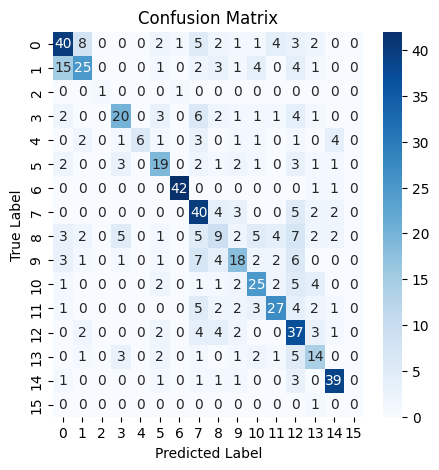

Accuracy:  0.5674
Precision: 0.5817
Recall:    0.5674
F1 Score:  0.5614


c:\Zeugs\cv\cv_venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from ts_model_functions import evaluate_model_v2

# evaluate model (v2)
accuracy, precision, recall, f1 = evaluate_model_v2(model, test_dataloader)